In [18]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors


import matplotlib.colors as colors  # Make sure to import this

from matplotlib.colors import LinearSegmentedColormap

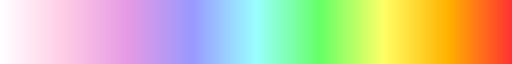

In [2]:
alpha = 1

# Define the colors in a less pastel, but still soft gradient
color_list = [
    (1, 1, 1),  # White
    (1, 0.8, 0.9),  # Light Pink
    (0.9, 0.6, 0.9),  # Pinkish Purple
    (0.6, 0.6, 1),  # Light Blue
    (0.6, 1, 1),  # Light Cyan
    (0.4, 1, 0.4),  # Soft Green
    (1, 1, 0.4),  # Soft Yellow
    (1, 0.7, 0),  # Soft Orange
    (1, 0.2, 0.2),  # Soft Red
]

# Create the colormap using the defined colors
soft_colormap = LinearSegmentedColormap.from_list("SoftHSV", color_list, N=1000)

soft_colormap

In [3]:
def exponential_grid(size, scale=1.0):
    # Create a 2D grid of coordinates
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the distance from the center (0,0)
    distance = np.sqrt(X**2 + Y**2)
    
    # Apply an exponential function that increases as you get closer to the center
    grid = np.exp(-distance / scale)  # Modify scale for sharpness of the center
    
    return grid

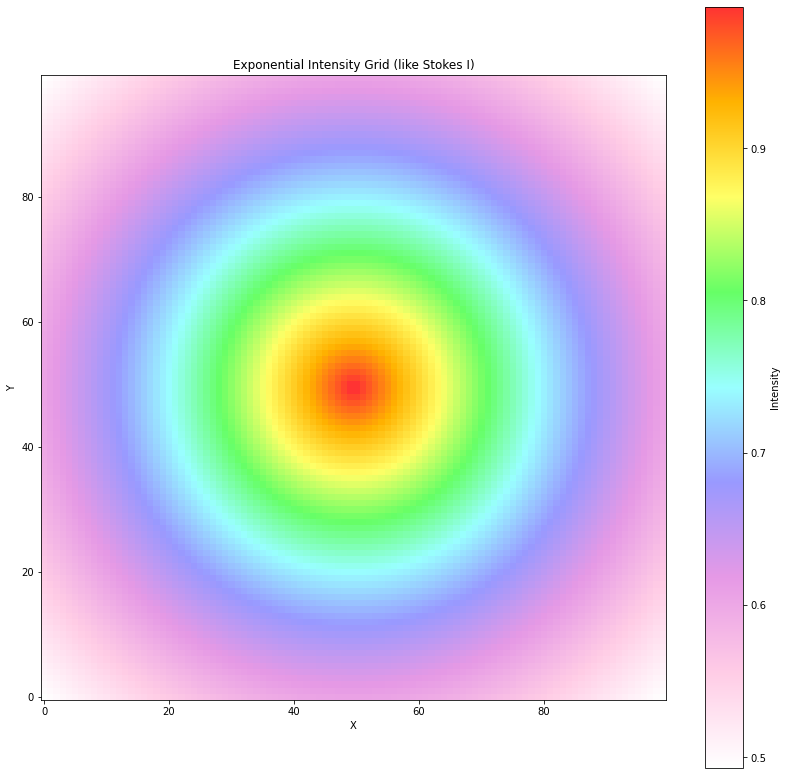

In [4]:
# Plotting the result
size = 100  # Size of the grid
scale = 2  # Exponential decay scale

# Generate the exponential grid
grid = exponential_grid(size, scale)

# Plot the grid
plt.figure(figsize=(14, 14))
plt.imshow(grid, origin='lower', cmap=soft_colormap)
plt.colorbar(label='Intensity')
plt.title('Exponential Intensity Grid (like Stokes I)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [5]:
# Custom color map function with n breaks
def create_custom_colormap(n):
    # Define n equally spaced breakpoints between 0 and 1
    boundaries = np.linspace(0, 1, n+1)
    
    # Define the colors for the breaks (you can modify this)
    colors_list = plt.cm.viridis(boundaries)  # Using the viridis colormap as an example
    
    # Create a colormap from these colors
    cmap = colors.ListedColormap(colors_list)
    
    # Normalize the colormap so that it spans the boundaries
    norm = colors.BoundaryNorm(boundaries, cmap.N)
    
    return cmap, norm


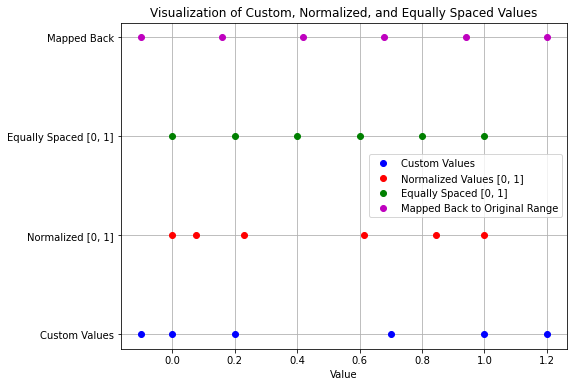

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Custom values you want to normalize and space equally
custom_values = [-0.1, 0, 0.2, 0.7, 1, 1.2]

# Step 1: Normalize the custom values to the range [0, 1]
min_val = min(custom_values)
max_val = max(custom_values)

# Normalize the custom values to be between 0 and 1
normalized_values = [(val - min_val) / (max_val - min_val) for val in custom_values]

# Step 2: Create equally spaced values between 0 and 1
n = len(custom_values) - 1  # Number of intervals (ticks between values)
equal_space_values = np.linspace(0, 1, n+1)  # +1 to include both edges

# Step 3: Map the equally spaced values back to the original range
mapped_values = [min_val + val * (max_val - min_val) for val in equal_space_values]

# Plotting to visualize
plt.figure(figsize=(8, 6))

# Plot custom values (original values) as blue dots
plt.plot(custom_values, np.zeros_like(custom_values), 'bo', label="Custom Values")

# Plot normalized values as red dots
plt.plot(normalized_values, np.ones_like(normalized_values), 'ro', label="Normalized Values [0, 1]")

# Plot equally spaced values between 0 and 1 as green dots
plt.plot(equal_space_values, np.ones_like(equal_space_values)*2, 'go', label="Equally Spaced [0, 1]")

# Map values back to original range and plot them
plt.plot(mapped_values, np.ones_like(mapped_values)*3, 'mo', label="Mapped Back to Original Range")

# Labels and title
plt.yticks([0, 1, 2, 3], ['Custom Values', 'Normalized [0, 1]', 'Equally Spaced [0, 1]', 'Mapped Back'])
plt.xlabel('Value')
plt.title('Visualization of Custom, Normalized, and Equally Spaced Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [7]:
custom_values

[-0.1, 0, 0.2, 0.7, 1, 1.2]

In [8]:
normalized_values

[0.0,
 0.07692307692307693,
 0.23076923076923078,
 0.6153846153846153,
 0.8461538461538461,
 1.0]

In [9]:
equal_space_values

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [10]:
mapped_values

[-0.1, 0.16, 0.42000000000000004, 0.6800000000000002, 0.9400000000000001, 1.2]

In [26]:
custom_values = [-0.1, 0, 0.2, 0.7, 1]

min_val = min(custom_values)
max_val = max(custom_values)

custom_values

[-0.1, 0, 0.2, 0.7, 1]

In [12]:
normalized_values = [(val - min_val) / (max_val - min_val) for val in custom_values]
normalized_values

[0.0, 0.09090909090909091, 0.27272727272727276, 0.7272727272727272, 1.0]

In [13]:
# Step 2: Create equally spaced values between 0 and 1 (from [0, 1])
equal_spacing_locations = np.linspace(0, 1, len(custom_values))
equal_spacing_locations

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
# Step 3: Map the equally spaced values back to the original range
mapped_values = [min_val + val * (max_val - min_val) for val in equal_space_values]
mapped_values

[-0.1,
 0.12000000000000002,
 0.3400000000000001,
 0.5600000000000002,
 0.7800000000000001,
 1.0]

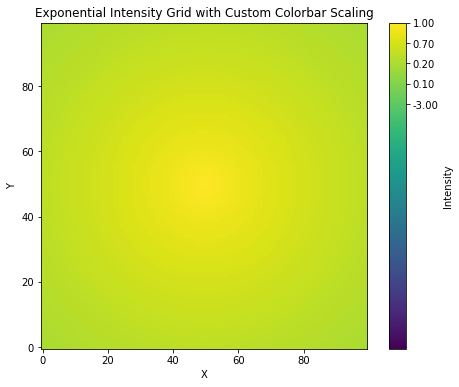

In [27]:
# Generate the exponential grid
size = 100  # Size of the grid
scale = 2  # Exponential decay scale
grid = exponential_grid(size, scale)

# Custom values you want to normalize and space equally
custom_values = [-3, 0.1, 0.2, 0.7, 1]

# Step 1: Find the min and max values of the custom values
min_val = min(custom_values)
max_val = max(custom_values)

# Step 2: Create equally spaced values between 0 and 1 (for colorbar scaling)
equal_spacing_locations = np.linspace(0, 1, len(custom_values))

# Step 3: Use Normalize to scale the data to the [0, 1] range
norm = colors.Normalize(vmin=min_val, vmax=max_val)

# Plotting the result
plt.figure(figsize=(8, 6))  # Adjusted figure size for clarity

# Plot the grid with a smooth colormap (continuous gradient)
cax = plt.imshow(grid, 
                 origin='lower', 
                 cmap='viridis', 
                 norm=norm)  # Apply the continuous norm

# Add the colorbar with tick positions corresponding to custom values
colorbar = plt.colorbar(cax, label='Intensity')
colorbar.set_ticks(equal_spacing_locations)  # Set the custom ticks
colorbar.set_ticklabels([f'{val:.2f}' for val in custom_values])  # Format the tick labels

# Set plot title and labels
plt.title('Exponential Intensity Grid with Custom Colorbar Scaling')
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

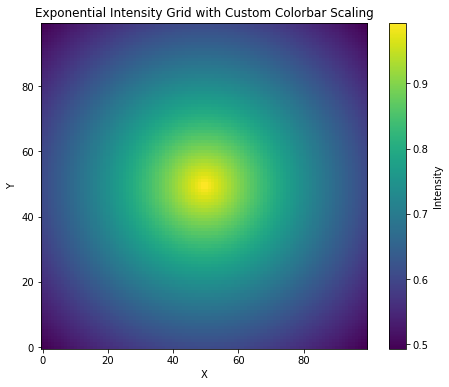

In [28]:
# Generate the exponential grid
size = 100  # Size of the grid
scale = 2  # Exponential decay scale
grid = exponential_grid(size, scale)


# Plotting the result
plt.figure(figsize=(8, 6))  # Adjusted figure size for clarity

# Plot the grid with a smooth colormap (continuous gradient)
cax = plt.imshow(grid, 
                 origin='lower', 
                 cmap='viridis')  # Apply the continuous norm

# Add the colorbar with tick positions corresponding to custom values
colorbar = plt.colorbar(cax, label='Intensity')



plt.title('Exponential Intensity Grid with Custom Colorbar Scaling')
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()